# Домашнее задание

## Задача

Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных
студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных.
Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование
данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения
моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть
изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать
выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать
не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится
обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров.
Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять
функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей
с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.метрик.

## Решение

In [3]:
!pip install gmdhpy
!pip install heamy
from google.colab import files

  Created wheel for heamy: filename=heamy-0.0.7-py2.py3-none-any.whl size=15352 sha256=3674c59a4cc97ae1f3eee26c736e829a81ff749c89e4517e83de54a9a1e887aa
  Stored in directory: /root/.cache/pip/wheels/ab/05/27/334fcc59e6279e70d84880e6988ea934d740829a900f14352f
Successfully built heamy


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.utils import shuffle
from gmdhpy import gmdh
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных  построение модели машинного обучения для решения или задачи регрессии.

This dataset contains the first 10min. stats of approx. 10k ranked games (SOLO QUEUE) from a high ELO (DIAMOND I to MASTER). Players have roughly the same level.

Each game is unique. The gameId can help you to fetch more attributes from the Riot API.

There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level… It's up to you to do some feature engineering to get more insights.

The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won. 0 otherwise.


In [5]:
data = pd.read_csv('high_diamond_ranked_10min.csv', sep=',')
data.head()

gameId  blueWins  ...  redCSPerMin  redGoldPerMin
0  4519157822         0  ...         19.7         1656.7
1  4523371949         0  ...         24.0         1762.0
2  4521474530         0  ...         20.3         1728.5
3  4524384067         0  ...         23.5         1647.8
4  4436033771         0  ...         22.5         1740.4

[5 rows x 40 columns]

In [6]:
data.shape

(9879, 40)

In [7]:
data.isnull().sum() 

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

В исходном датасете нет пропусков, все данные представлены в формате int64.

### 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [8]:
data.describe()

gameId     blueWins  ...  redCSPerMin  redGoldPerMin
count  9.879000e+03  9879.000000  ...  9879.000000    9879.000000
mean   4.500084e+09     0.499038  ...    21.734923    1648.904140
std    2.757328e+07     0.500024  ...     2.191167     149.088841
min    4.295358e+09     0.000000  ...    10.700000    1121.200000
25%    4.483301e+09     0.000000  ...    20.300000    1542.750000
50%    4.510920e+09     0.000000  ...    21.800000    1637.800000
75%    4.521733e+09     1.000000  ...    23.300000    1741.850000
max    4.527991e+09     1.000000  ...    28.900000    2273.200000

[8 rows x 40 columns]

In [0]:
for col in data.columns:
  if (col.startswith('red')):
    data = data.drop([col], axis=1)
data = data.drop(["gameId"], axis=1)
#data["Region_ID"] =data["Region_ID"].fillna(method='ffill')

#data=data.dropna()

In [10]:
for col in data.columns:
  print(col+": "+str(len(data[col].unique())))

blueWins: 2
blueWardsPlaced: 147
blueWardsDestroyed: 27
blueFirstBlood: 2
blueKills: 21
blueDeaths: 21
blueAssists: 30
blueEliteMonsters: 3
blueDragons: 2
blueHeralds: 2
blueTowersDestroyed: 5
blueTotalGold: 4739
blueAvgLevel: 17
blueTotalExperience: 4143
blueTotalMinionsKilled: 148
blueTotalJungleMinionsKilled: 74
blueGoldDiff: 6047
blueExperienceDiff: 5356
blueCSPerMin: 148
blueGoldPerMin: 4739


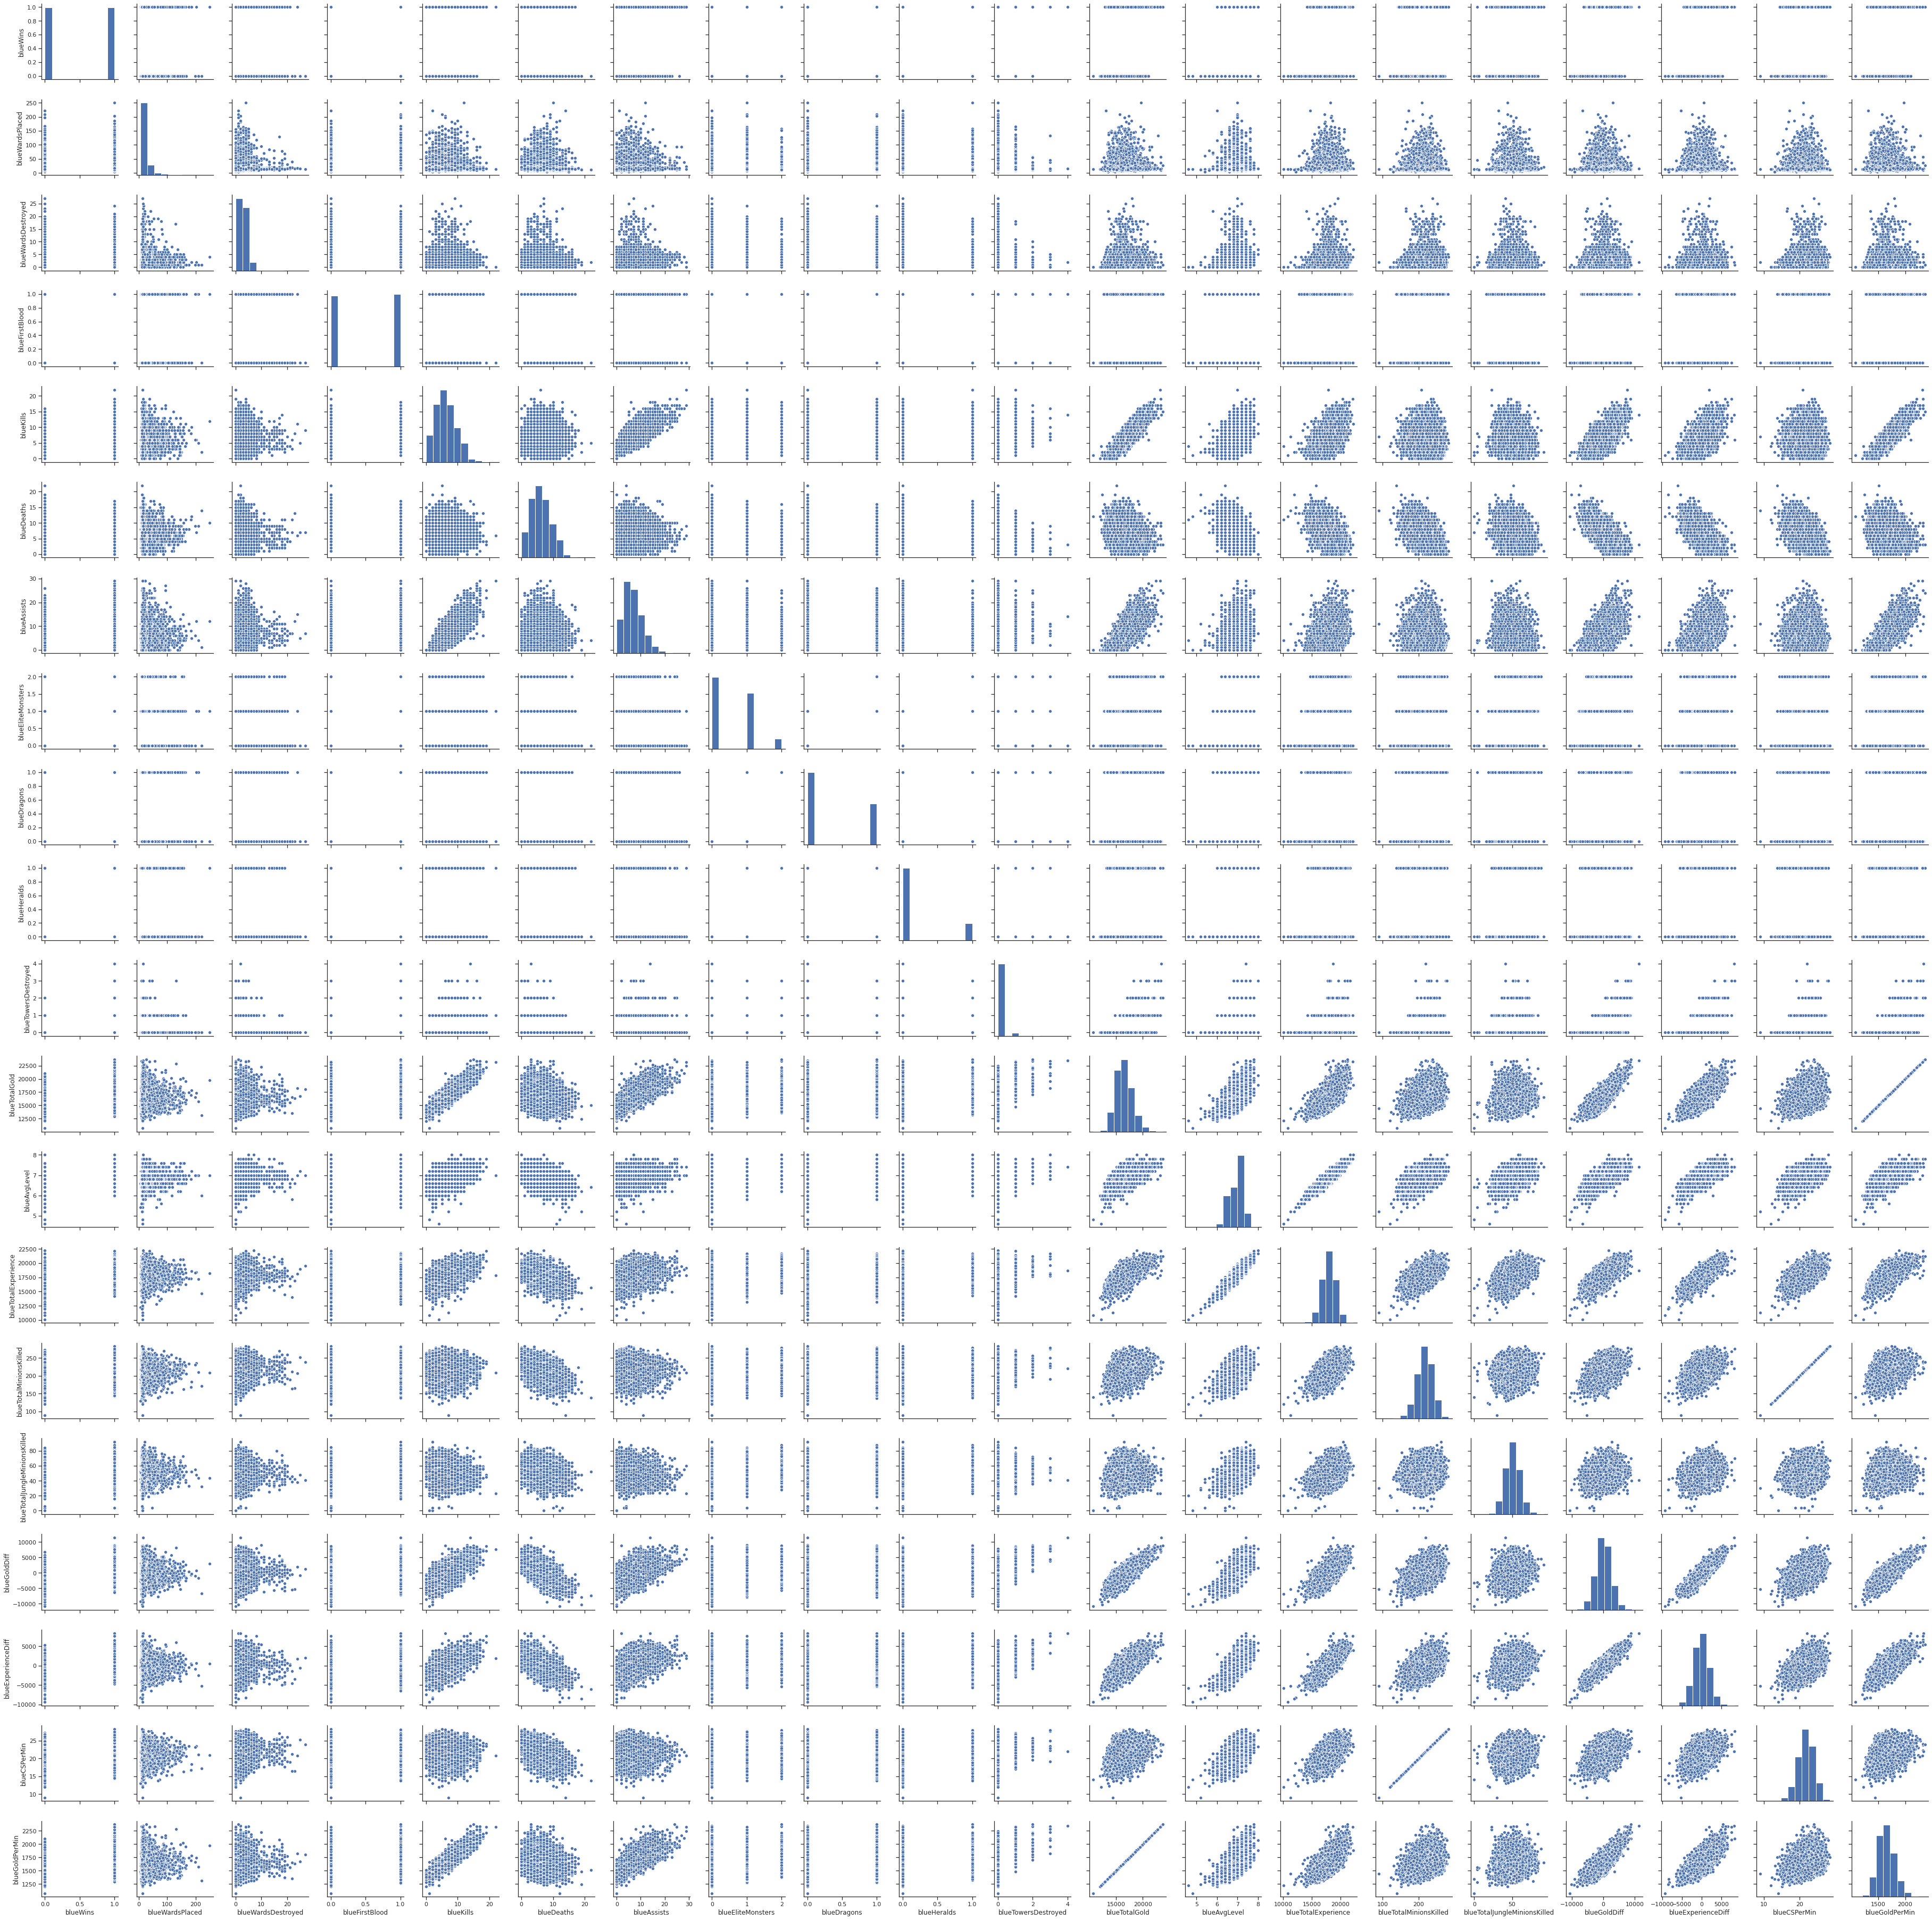

In [10]:
sns.pairplot(data)

Сильная корреляция присутствует между общим кол-вом золота и кол-вом золота в минуту, что довольно очевидно

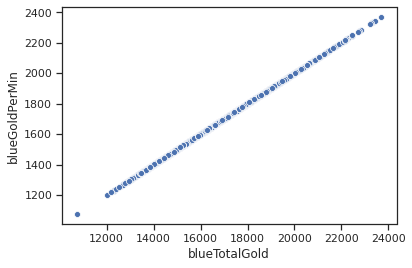

In [11]:
sns.scatterplot(x='blueTotalGold', y='blueGoldPerMin', data=data)

Также наблюдается значимая корреляция между средним уровнем игрока и количеством опыта команды

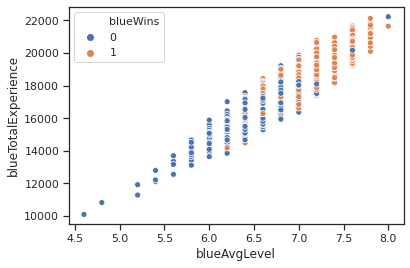

In [12]:
sns.scatterplot(x='blueAvgLevel', y='blueTotalExperience', data=data, hue='blueWins')

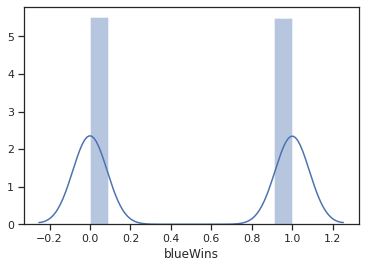

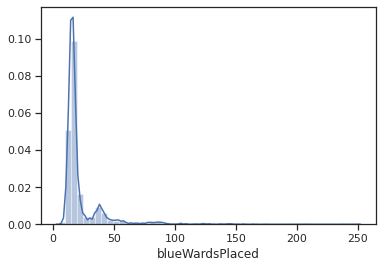

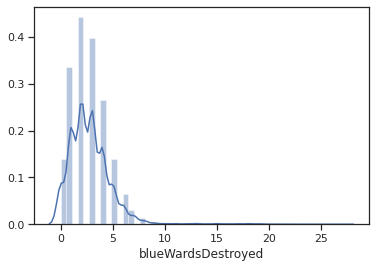

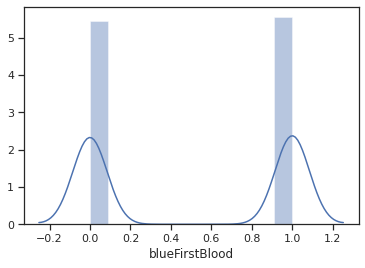

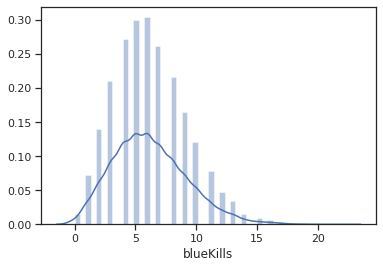

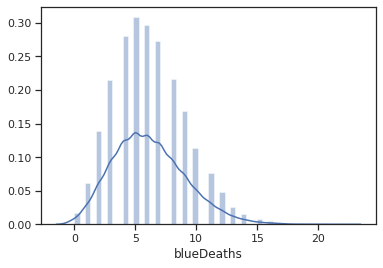

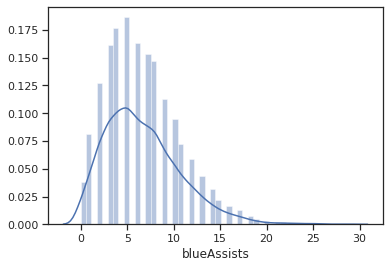

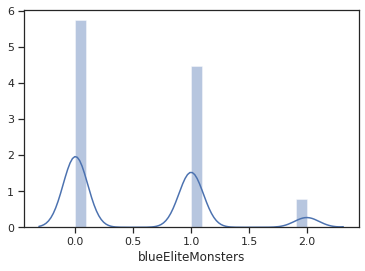

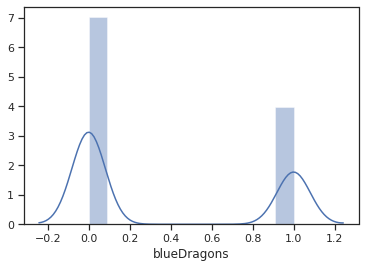

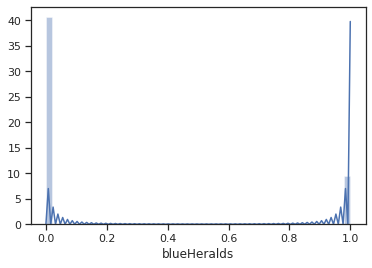

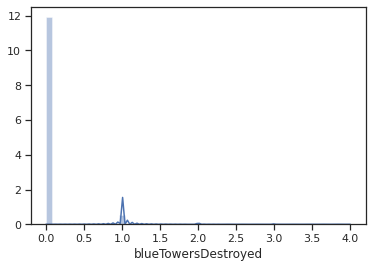

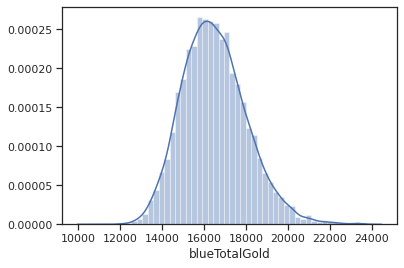

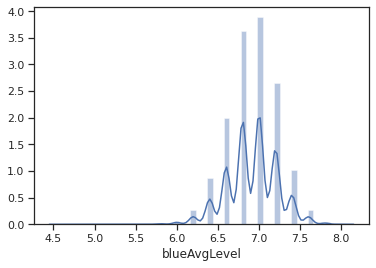

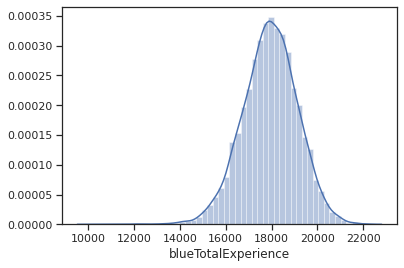

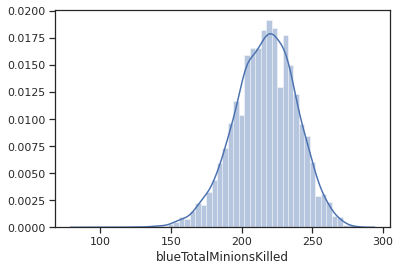

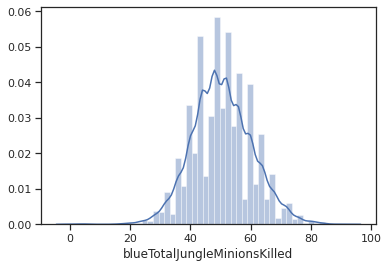

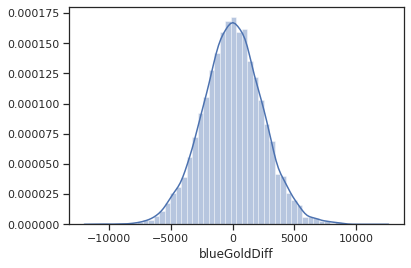

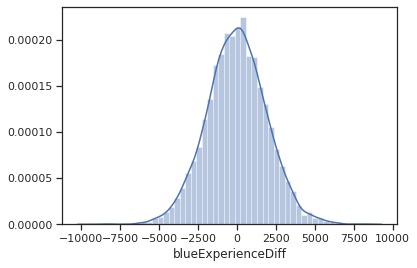

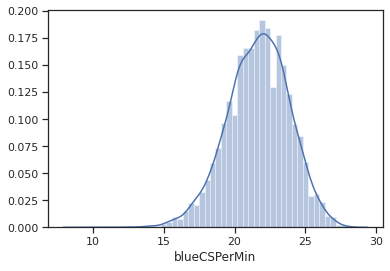

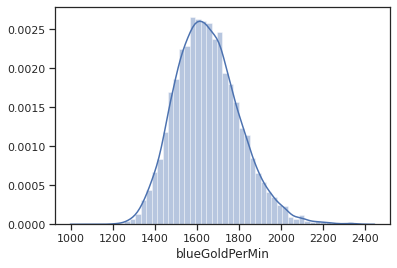

In [13]:
for col in data.columns:
    sns.distplot(data[col])
    plt.show()

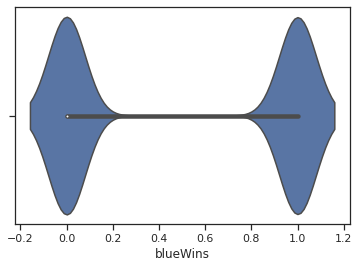

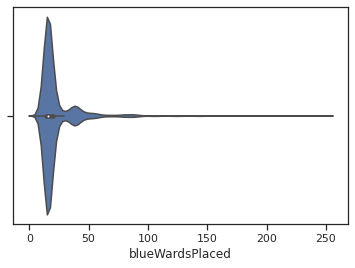

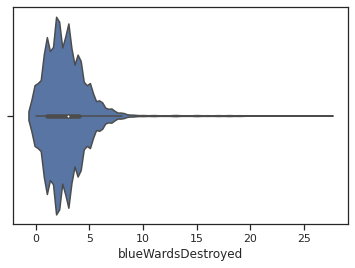

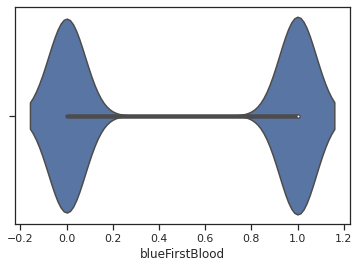

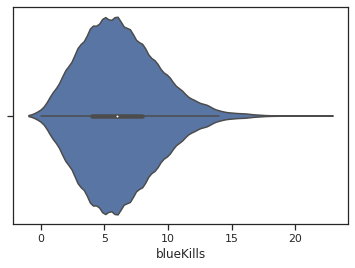

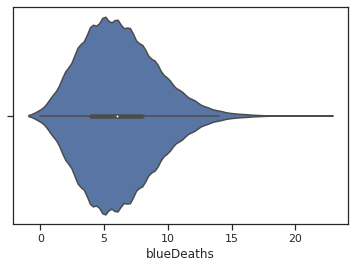

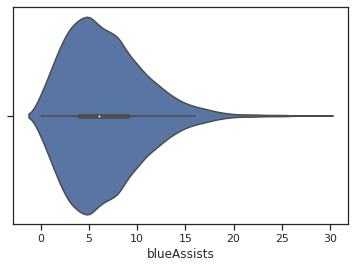

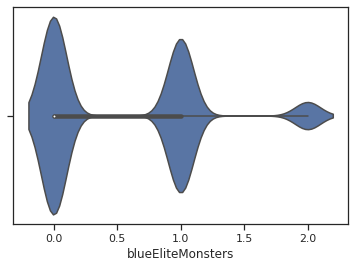

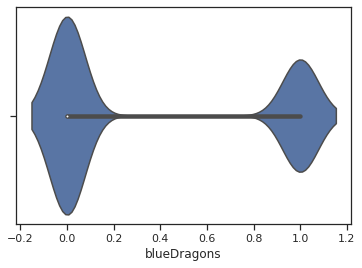

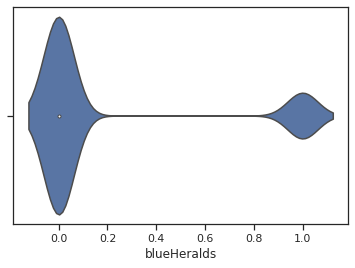

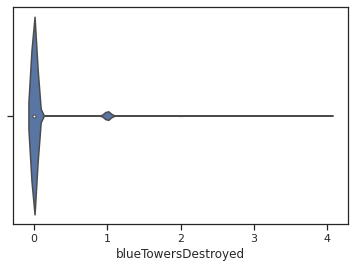

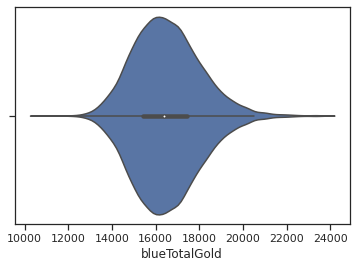

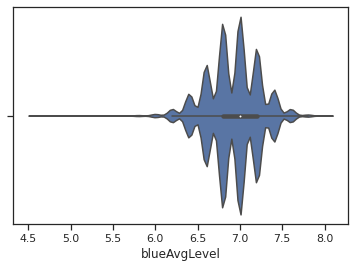

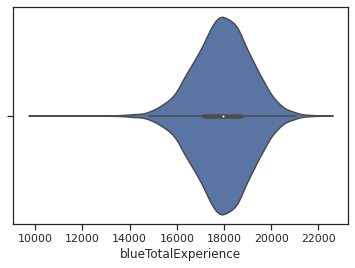

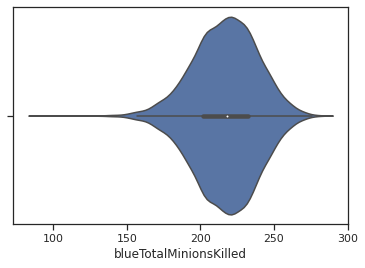

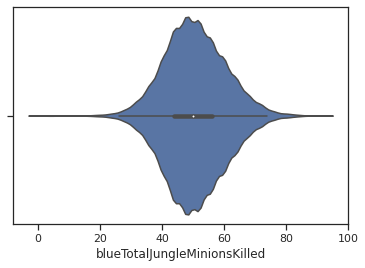

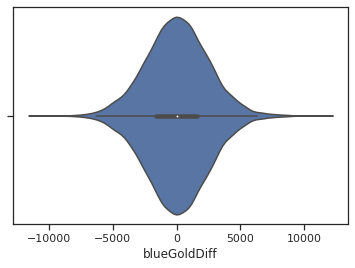

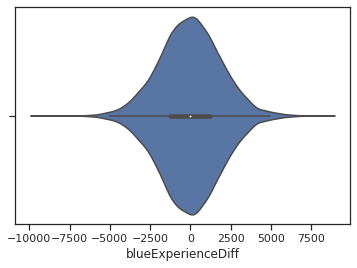

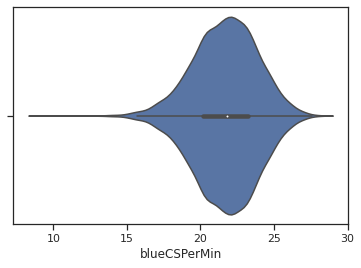

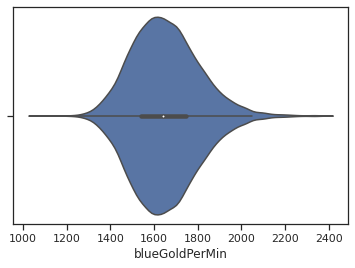

In [25]:
for col in data.columns:
    sns.violinplot(x=data[col])
    plt.show()

### 3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

#### Все данные - числовые

In [14]:
data.dtypes 

blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
dtype: object

#### Масштабирование данных. 

In [0]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data)

Добавим масштабированные данные в набор данных


In [0]:
for i in range(len(data.columns)):
    col = data.columns[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [17]:
data.head()

blueWins  blueWardsPlaced  ...  blueCSPerMin_scaled  blueGoldPerMin_scaled
0         0               28  ...             0.544041               0.499576
1         0               12  ...             0.435233               0.306993
2         0               15  ...             0.497409               0.415003
3         0               43  ...             0.575130               0.341300
4         0               75  ...             0.621762               0.437129

[5 rows x 40 columns]

Проверим, что масштабирование не повлияло на распределение данных

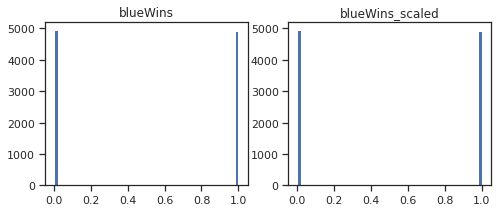

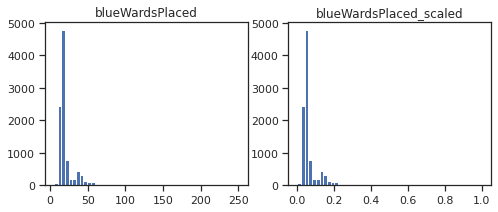

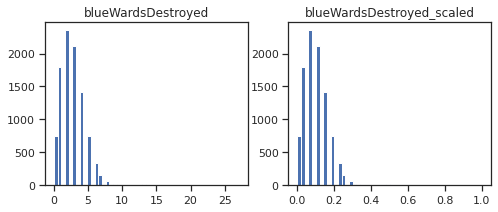

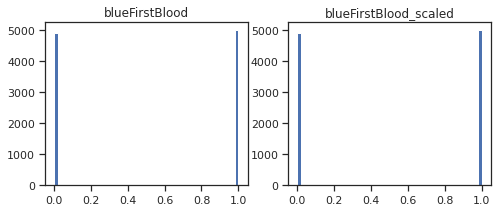

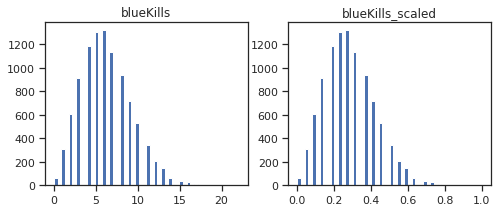

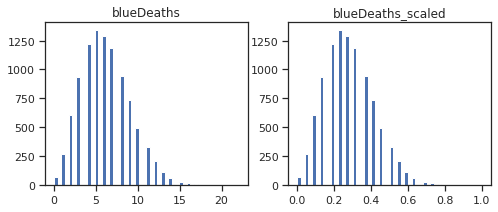

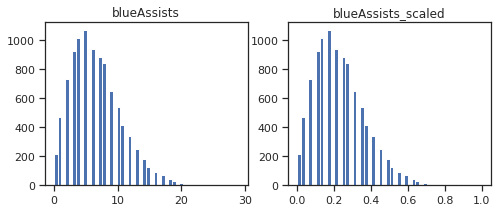

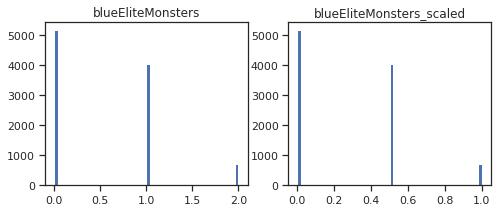

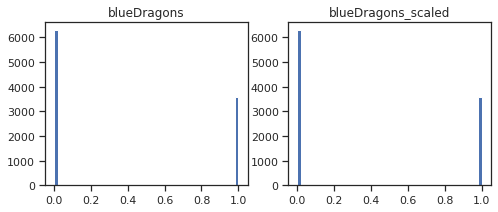

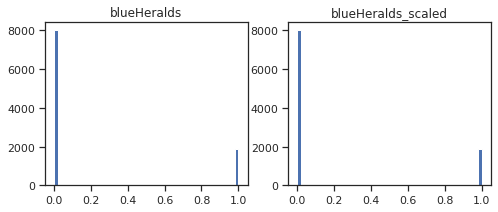

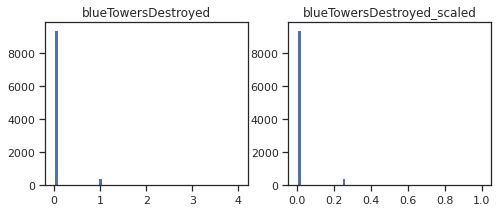

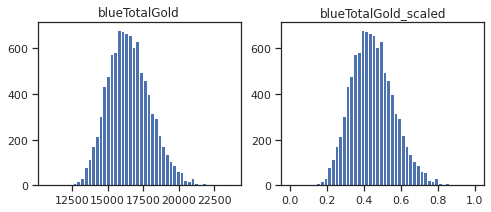

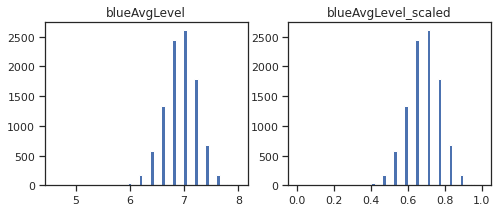

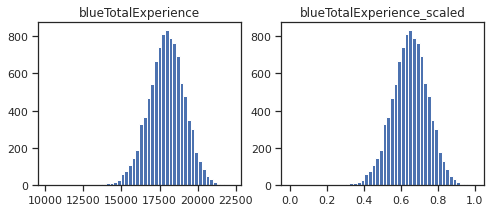

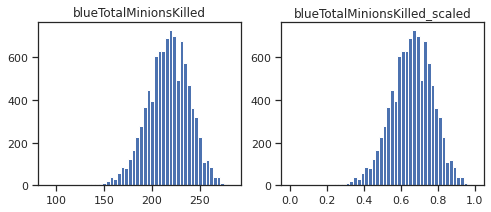

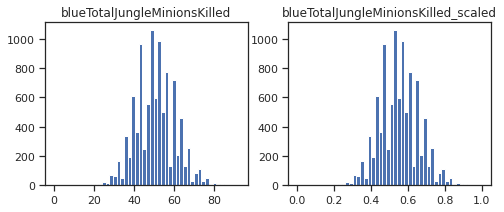

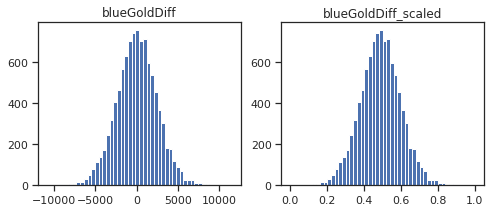

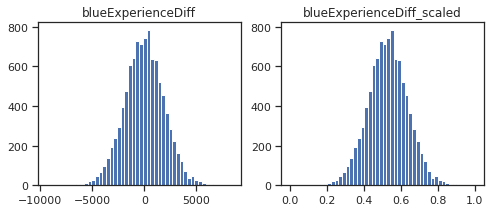

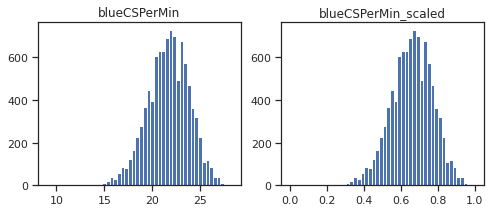

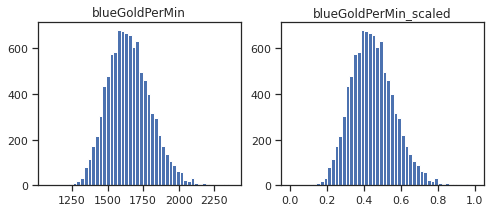

In [18]:
for col in data.columns[0:int(len(data.columns)/2)]:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

### 4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

Воспользуемся наличием тестовых выборок, включив их в корреляционную матрицу

In [19]:
corr_cols_1 = data.columns[0:int(len(data.columns)/2)]
corr_cols_1

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin'],
      dtype='object')

In [20]:
corr_cols_2 = data.columns[int(len(data.columns)/2):len(data.columns)]
corr_cols_2

Index(['blueWins_scaled', 'blueWardsPlaced_scaled',
       'blueWardsDestroyed_scaled', 'blueFirstBlood_scaled',
       'blueKills_scaled', 'blueDeaths_scaled', 'blueAssists_scaled',
       'blueEliteMonsters_scaled', 'blueDragons_scaled', 'blueHeralds_scaled',
       'blueTowersDestroyed_scaled', 'blueTotalGold_scaled',
       'blueAvgLevel_scaled', 'blueTotalExperience_scaled',
       'blueTotalMinionsKilled_scaled', 'blueTotalJungleMinionsKilled_scaled',
       'blueGoldDiff_scaled', 'blueExperienceDiff_scaled',
       'blueCSPerMin_scaled', 'blueGoldPerMin_scaled'],
      dtype='object')

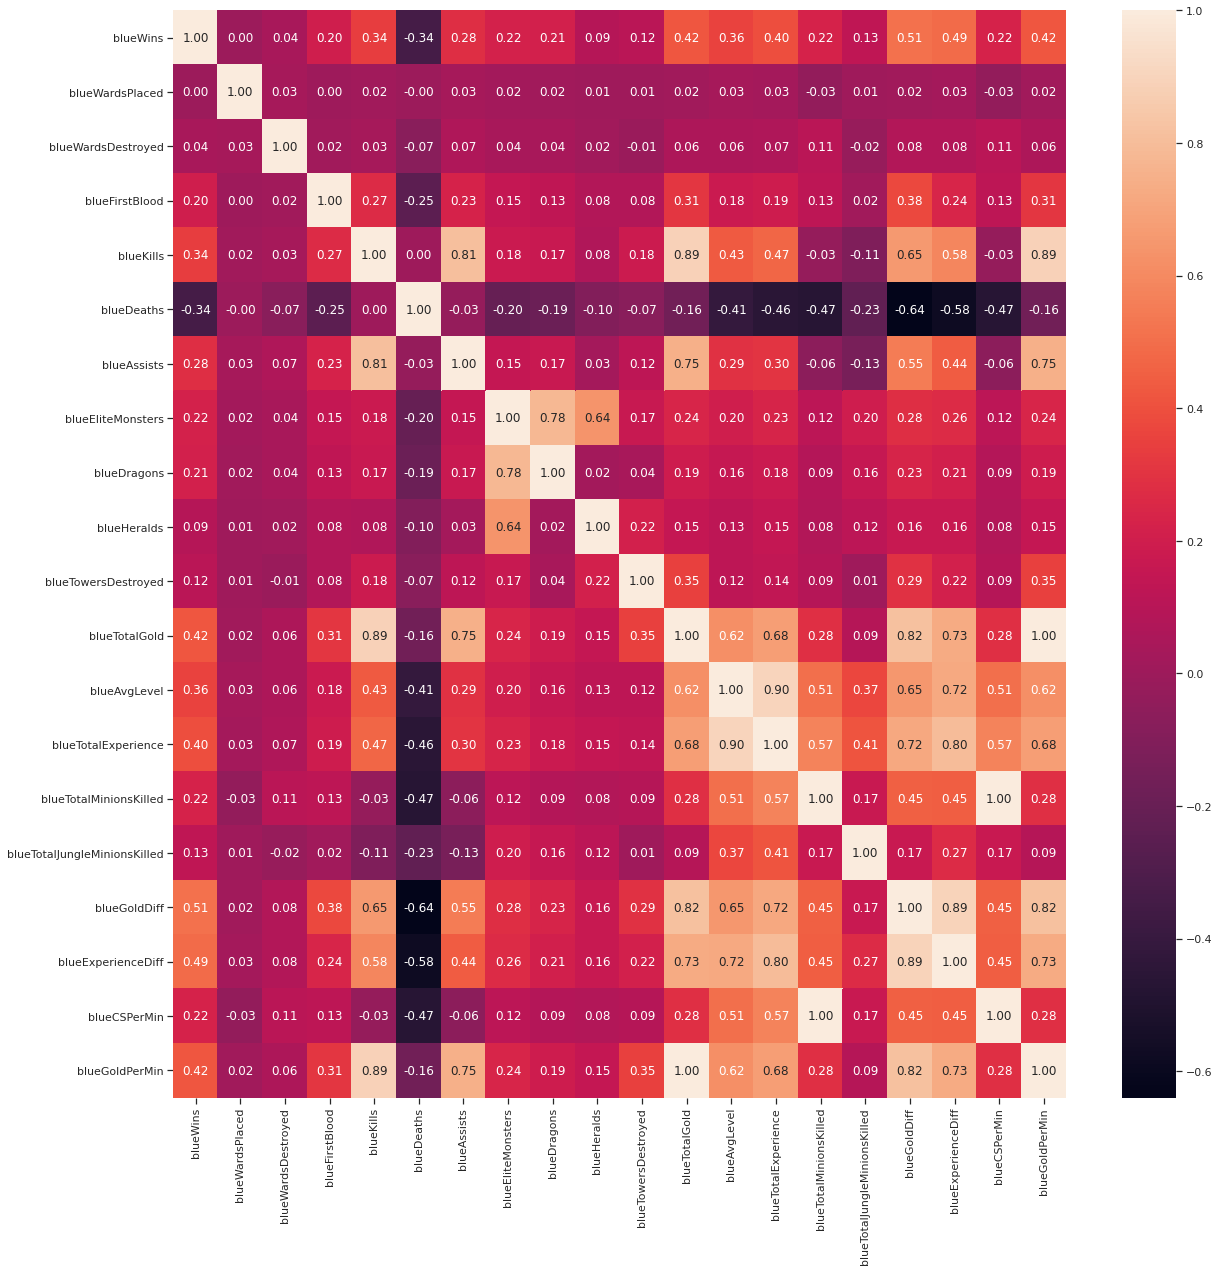

In [25]:
plt.figure(figsize = (20,20))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

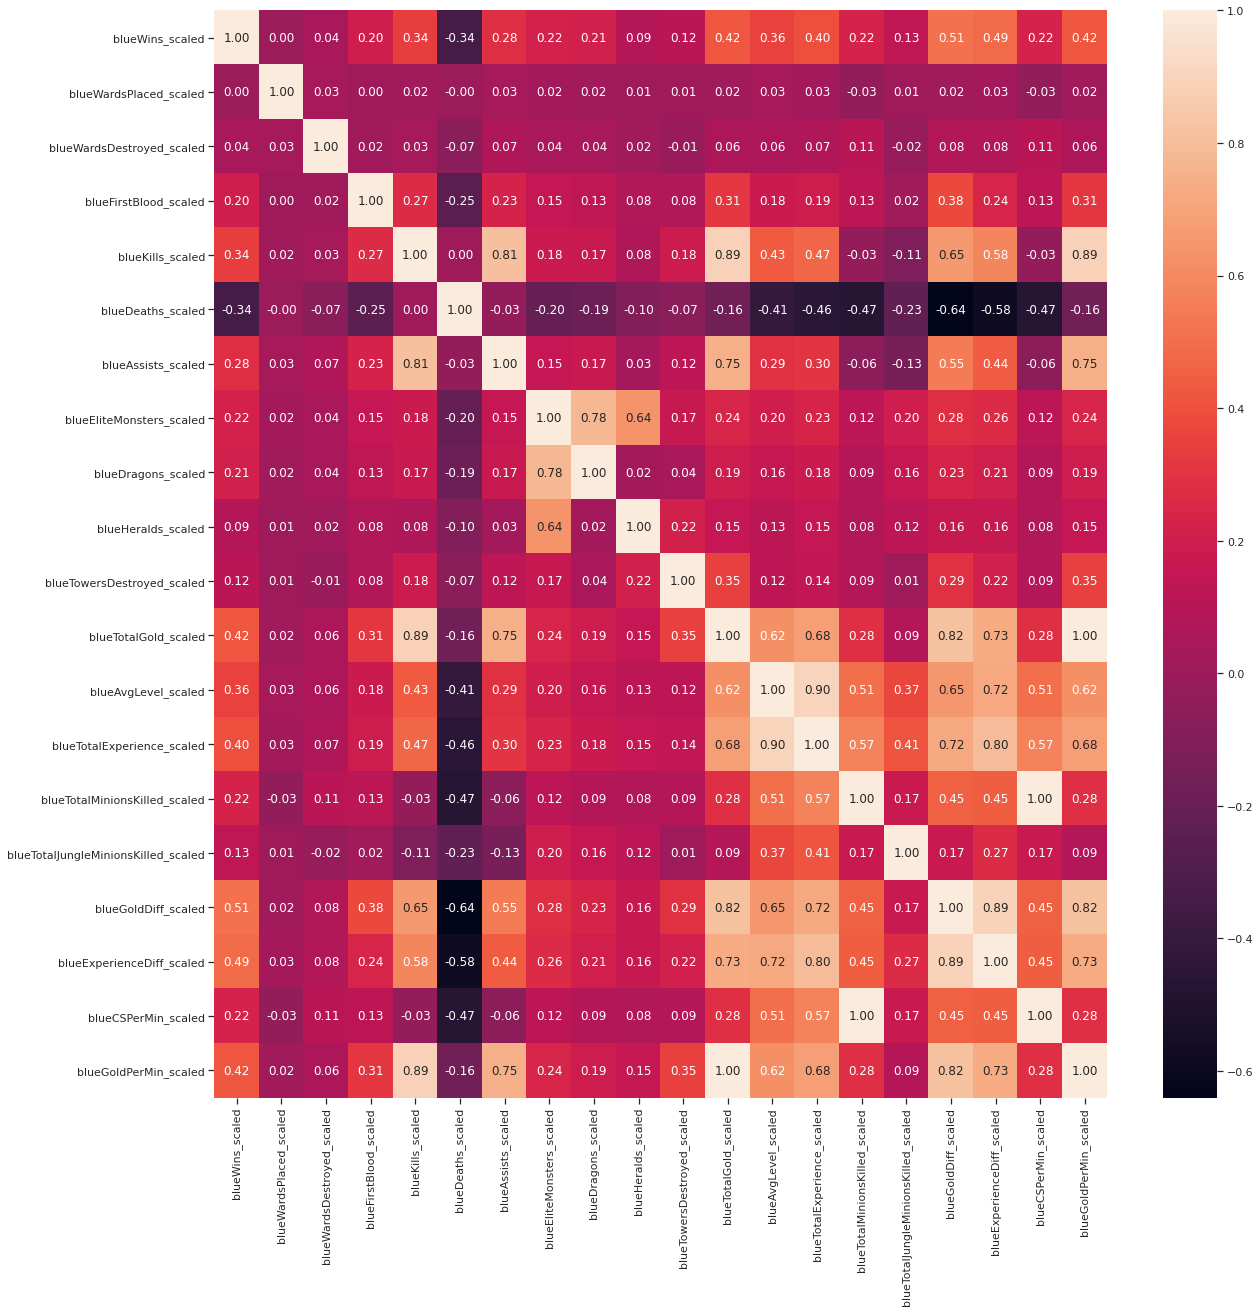

In [24]:
plt.figure(figsize = (20,20))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

Количество подтвержденных заражений коррелирует с количеством смертей и количеством выздоровлений.

### 5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.

Возьмем метрики MAE, Median Absolute Error и  R².
- MAE (Mean Absolute Error) — это среднее модуля ошибки. Данная метрика удобна, она не чувствительна к выбросам,  как MSE, показывает среднюю ошибку
- Медиана абсолютного отклонения(Median Absolute Error) - это альтернатива стандартного отклонения, менее чувствительна к воздействию промахов
- Коэффициент детерминации показывает, насколько модель соответствует или не соответствует данным.

In [0]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

### 6. Выбор наиболее подходящих моделей для решения задачи  регрессии.

- Возьмем модели случайный лес и дерево решений, поскольку они показали оптимальные результаты.
- В качестве ансамблевой модели возьмем 'TREE+RF=>LR' модель

### 7. Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [27]:
data_new = shuffle(data)
data_new

blueWins  blueWardsPlaced  ...  blueCSPerMin_scaled  blueGoldPerMin_scaled
1427         0               22  ...             0.393782               0.464035
2619         0               60  ...             0.704663               0.478606
4117         1               20  ...             0.580311               0.489168
4301         1               18  ...             0.756477               0.704418
2243         1               14  ...             0.652850               0.390101
...        ...              ...  ...                  ...                    ...
7538         0               10  ...             0.673575               0.634415
8355         0               17  ...             0.647668               0.303446
32           0               12  ...             0.585492               0.440059
599          1               14  ...             0.865285               0.422789
8347         1               20  ...             0.715026               0.583764

[9879 rows x 40 columns]

На основе масштабированных данных выделим обучающую и тестовую выборки

In [28]:
train_data_all = data_new[:int(len(data_new)/1.39)]
test_data_all = data_new[int(len(data_new)/1.39):]
train_data_all.shape, test_data_all.shape

((7107, 40), (2772, 40))

Признаки для задачи регресии (опустим название)

In [0]:
task_regr_cols = data.columns

Выборки для задачи регресии

In [30]:
regr_X_train = train_data_all[task_regr_cols]
regr_X_test = test_data_all[task_regr_cols]
regr_Y_train = train_data_all['blueKills']
regr_Y_test = test_data_all['blueKills']
regr_X_train.shape, regr_X_test.shape, regr_Y_train.shape, regr_Y_test.shape

((7107, 40), (2772, 40), (7107,), (2772,))

### 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

Модели

In [0]:
regr_models = {'Tree':DecisionTreeRegressor(max_depth=8),
               'RF':RandomForestRegressor(max_depth=10, n_estimators=30),
              }

Сохранение метрик

In [0]:
regrMetricLogger = MetricLogger()

In [0]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)
    
    mae = mean_absolute_error(regr_Y_test, Y_pred)
    medae = median_absolute_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MedAE', model_name, medae)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MedAE={}, R2={}'.format(
        round(mae, 3), round(medae, 3), round(r2, 3)))
    print('*****************************************************')

In [38]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE=0.002, MedAE=0.0, R2=0.999
*****************************************************
*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, o

#### Ансамблевая модель

Набор данных

In [0]:
dataset = Dataset(regr_X_train, regr_Y_train, regr_X_test)

Возьмем лучшую модель: 'TREE+RF=>LR' модели первого уровня

In [0]:
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, parameters={'max_depth':5},name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'max_depth':5},name='rf')

Первый уровень - две модели: дерево и случайный лес

Второй уровень: линейная регрессия 

In [0]:
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)

Модель второго уровня

In [43]:
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

results = stacker.validate(k=10,scorer=median_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.00908486639226596, 0.00844452476826851, 0.010192679949886593, 0.005784505086247262, 0.003439368784642883, 0.004164250564004699, 0.00630496570183896, 0.0068644513800357665, 0.005530026162344278, 0.007129144092352183]
Mean accuracy: 0.006693878288188709
Standard Deviation: 0.002014084524109763
Variance: 4.0565364702584505e-06
Metric: median_absolute_error
Folds accuracy: [0.001101140631776687, 0.0008148720436729207, 0.00309010700035639, 0.002572916280552562, 0.0024107190567974612, 0.0026439276462770778, 0.0017617080771739069, 0.0018144777048583194, 0.0016764212978621629, 0.0016310639027130591]
Mean accuracy: 0.0019517353642040547
Standard Deviation: 0.0006797866991099269
Variance: 4.6210995628677026e-07


### 9. Подбор гиперпараметров для выбранных моделей. 

#### Случайный лес

In [44]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
n_range = np.array(range(1,52,5))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51])}]

In [46]:
%%time
rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
rf_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 2min 11s, sys: 66.5 ms, total: 2min 12s
Wall time: 2min 12s


Лучшая модель

In [47]:
rf_gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=31, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Лучшее значение параметров

In [49]:
rf_gs.best_params_

{'max_depth': 31}

Изменение качества на тестовой выборке в зависимости от К-соседей

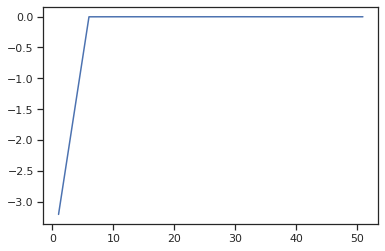

In [50]:
plt.plot(n_range, rf_gs.cv_results_['mean_test_score'])

#### Дерево

In [51]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [52]:
n_range = np.array(range(1,52,5))

tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51])}]

In [53]:
%%time
dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
dt_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 2.12 s, sys: 7 ms, total: 2.12 s
Wall time: 2.13 s


Лучшая модель

In [54]:
dt_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=21,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Лучшее значение параметров

In [55]:
dt_gs.best_params_

{'max_depth': 21}

Изменение качества на тестовой выборке 

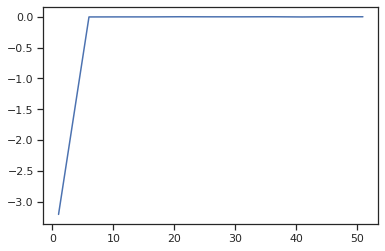

In [56]:
plt.plot(n_range, dt_gs.cv_results_['mean_test_score'])

#### Ансамблевая модель

#### Decision tree

In [57]:
n_range = [0.5, 1, 1.5, 2, 2.5, 3, 3.5]
tuned_parameters = [{'min_impurity_split': n_range}]
tuned_parameters

[{'min_impurity_split': [0.5, 1, 1.5, 2, 2.5, 3, 3.5]}]

In [58]:
%%time
np.warnings.filterwarnings('ignore')
ens_dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_dt_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 897 ms, sys: 4.97 ms, total: 902 ms
Wall time: 907 ms


Лучшая модель

In [59]:
ens_dt_gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=0.5,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Лучшее значение параметров

In [60]:
ens_dt_gs.best_params_

{'min_impurity_split': 0.5}

Изменение качества на тестовой выборке 

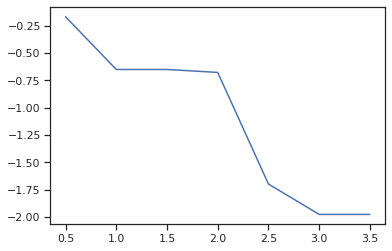

In [61]:
plt.plot(n_range, ens_dt_gs.cv_results_['mean_test_score'])

##### Random Forest

In [65]:
n_range = [1, 5, 10, 20, 30, 40 ,50 ,60]
tuned_parameters = [{'n_estimators': n_range}]
tuned_parameters

[{'n_estimators': [1, 5, 10, 20, 30, 40, 50, 60]}]

In [66]:
%%time
ens_rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_rf_gs.fit(regr_X_train, regr_Y_train)

CPU times: user 25.5 s, sys: 18.9 ms, total: 25.5 s
Wall time: 25.5 s


Лучшая модель

In [67]:
ens_rf_gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Лучшее значение параметров

In [68]:
ens_rf_gs.best_params_

{'n_estimators': 5}

Изменение качества на тестовой выборке 

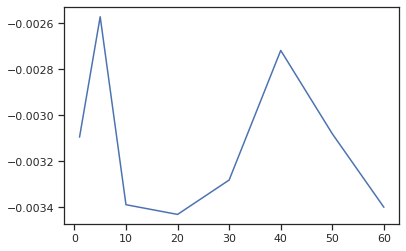

In [86]:
plt.plot(n_range, ens_rf_gs.cv_results_['mean_test_score'])

### 10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [0]:
regr_models_grid = {'Tree':dt_gs.best_estimator_,
                   'RF': rf_gs.best_estimator_
                   }

In [85]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=21,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE=0.002, MedAE=0.0, R2=0.999
*****************************************************
*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=31, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None,

#### Ансамблевый метод

Возьмем лучшую модель: 'TREE+RF=>LR'

In [0]:
model_tree = Regressor(dataset=dataset,
                       estimator=DecisionTreeRegressor,
                       parameters={'min_impurity_split':0.5,
                                  'max_depth':20},name='tree')
model_lr = Regressor(dataset=dataset,
                     estimator=LinearRegression,
                     name='lr')
model_rf = Regressor(dataset=dataset,
                     estimator=RandomForestRegressor,
                     parameters={'n_estimators': 60,
                                'max_depth': 40},name='rf')

pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)

модель второго уровня

In [0]:
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)

In [75]:
results = stacker.validate(k=10,scorer=mean_absolute_error)

results = stacker.validate(k=10,scorer=median_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.0012428281781332977, 0.007853259456890393, 0.0017528965153384235, 0.0009078159396061408, 0.00156958271602132, 0.000717910313780336, 0.0010460266650248293, 0.003638490806056249, 0.0014619509071356579, 0.001613149142343689]
Mean accuracy: 0.0021803910640330335
Standard Deviation: 0.0020402292246515063
Variance: 4.162535289122087e-06
Metric: median_absolute_error
Folds accuracy: [0.0004056264448024649, 0.0016987587906980295, 0.0005712733342884135, 0.0004919992997627354, 0.0006700884685955089, 0.0004536152895520118, 0.0005720926666619164, 0.0014381069188127427, 0.0005139845226018736, 0.0007634777038205698]
Mean accuracy: 0.0007579023439596266
Standard Deviation: 0.0004209366169494926
Variance: 1.7718763548888387e-07


Удалось добиться изменений.

### 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

Метрики качества модели

In [79]:
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MedAE', 'R2'], dtype=object)

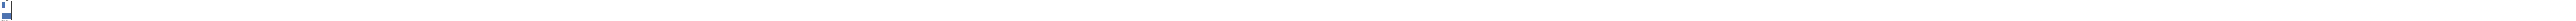

In [101]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', 
                      ascending=False, figsize=(4, 8))

Ансамбль: 32.4

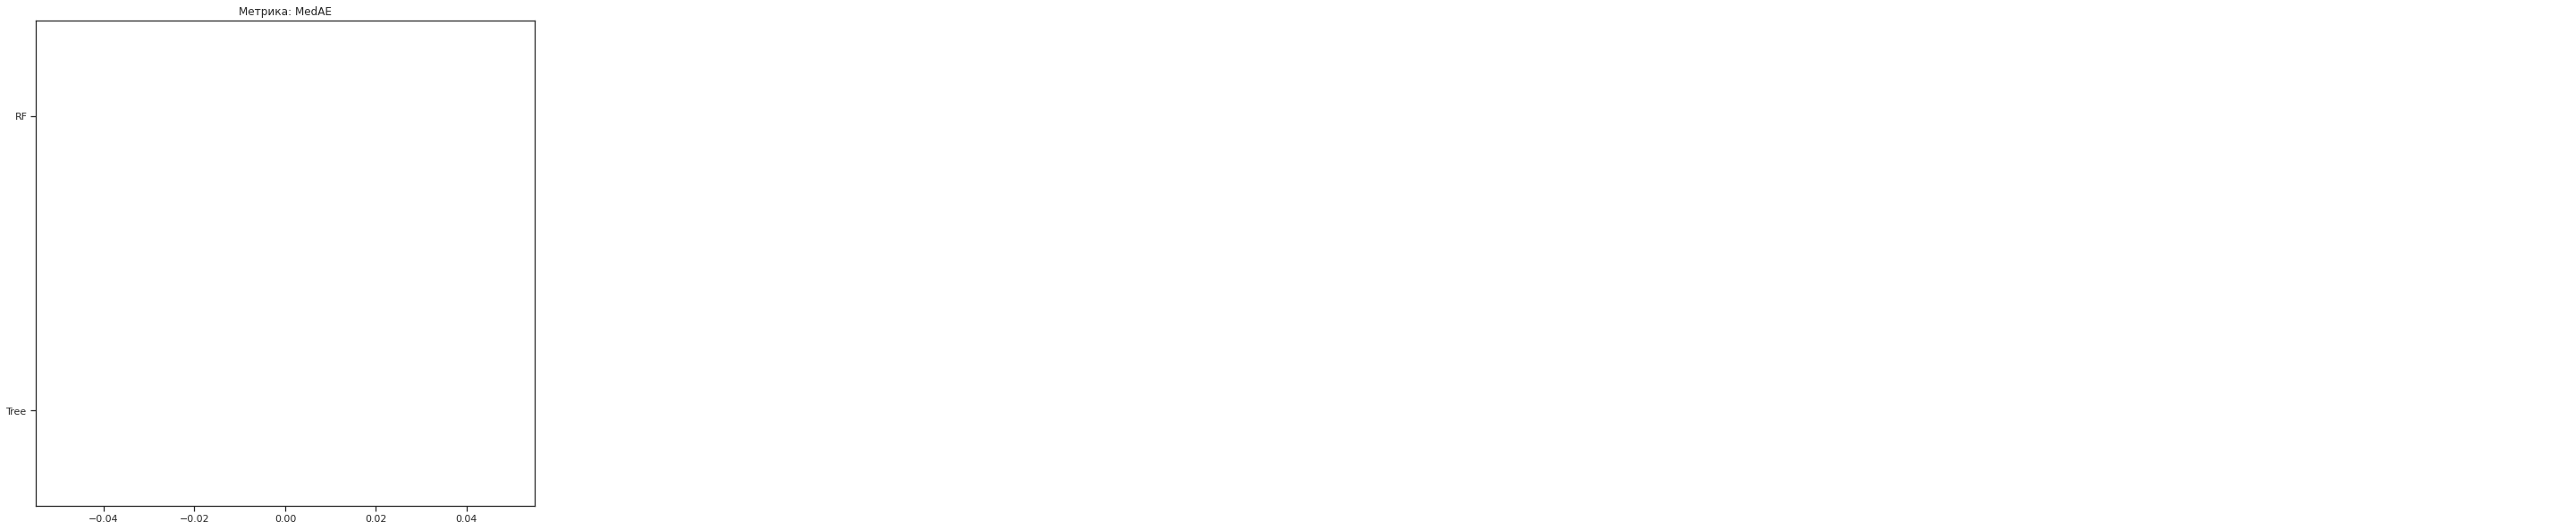

In [94]:
regrMetricLogger.plot('Метрика: ' + 'MedAE', 'MedAE', 
                      ascending=False, figsize=(10, 10))

Ансамбль: 10.1

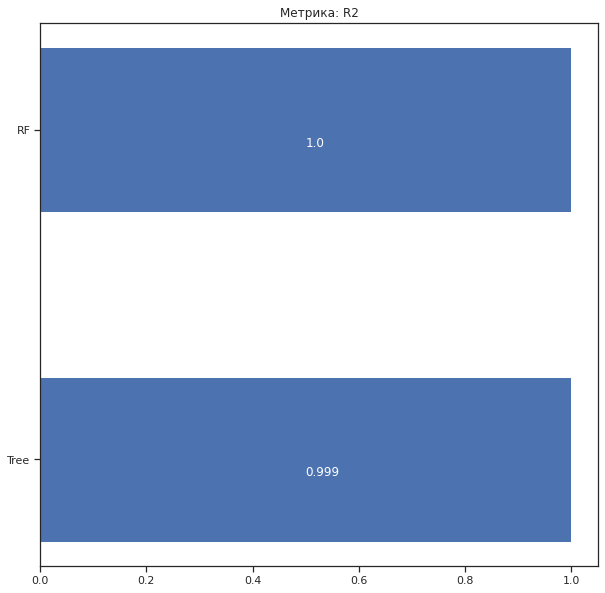

In [93]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2',
                      ascending=True, figsize=(10,10))

# Вывод

Исходя из размера ошибки модели, лучшие результаты показала модель случайного леса.